#### A final table with perplexity values for different models is provided below the application of different models.
***
#### At the end of the file there is an attempt to use Markov chain and links to sources, which were used in this work
***
#### Some examples of lyrics generation are provided (unfortunately, not for all LMs)

In [0]:
#import sys
#!{sys.executable} -m pip install nltk==3.5b1
#!{sys.executable} -m pip install lyricsgenius

In [5]:
import lyricsgenius
import json
import pandas as pd
import nltk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
nltk.download('punkt')
from nltk.lm.preprocessing import flatten
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.lm import KneserNeyInterpolated 
from nltk.lm import Laplace
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk import word_tokenize, sent_tokenize 
import textwrap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### The chunk below was commented after the work was done in order not to waste space on GitHub

In [0]:
#Checking whether installed module works correctly, setting Eminem as the author
genius = lyricsgenius.Genius("jHJB8vqrbfVDIGM1KrETFx6s7EG9SGN3RGcmr63z7Gjgz8dYY4LizTL9rGupTAl1")
#at first used to sort by title, but it brings remixes of same song, so let us sort by popularity 
#Eminem = genius.search_artist("Eminem", max_songs=300, sort="popularity")
genius.remove_section_headers = True
genius.skip_non_songs = False 
genius.verbose = False

#### At first I used only 300 Eminem's songs, and got pretty high perplexity. Then it was decided to expand the set in order to get better perplexity, so below I append  the lyrics of 50 Cent, since the Internet told me they are quite similar to Eminem's.



In [0]:
#Downloading 50 Cent lyrics to extend the vocabulary
genius = lyricsgenius.Genius("jHJB8vqrbfVDIGM1KrETFx6s7EG9SGN3RGcmr63z7Gjgz8dYY4LizTL9rGupTAl1")
#Cent_50 = genius.search_artist("50 Cent", max_songs=200, sort="popularity")
genius.remove_section_headers = True
genius.skip_non_songs = False 
genius.verbose = False

In [28]:
Eminem.save_lyrics(extension='txt')
Cent_50.save_lyrics(extension='txt')

Wrote `Lyrics_Eminem.txt`
Wrote `Lyrics_50Cent.txt`


In [0]:
#opening of files and tokenization
#at first I intended to delete the punctuation, but then decided to leave it since rap lyrics will look more interesting with punctuation
#however, maybe, it was a wrong decision
lyrics_em = open("Lyrics_Eminem.txt","r")
lyrics_cent = open("Lyrics_50Cent.txt","r")
token_lyrics_em = [list(map(str.lower, word_tokenize(sent))) 
                  for sent in lyrics_em]
token_lyrics_cent = [list(map(str.lower, word_tokenize(sent))) 
                  for sent in lyrics_cent]
lyrics = []
lyrics.extend(token_lyrics_em)
lyrics.extend(token_lyrics_cent)                 

Text(0.5, 1.0, 'Top 20 word in Eminem rap lyrics')

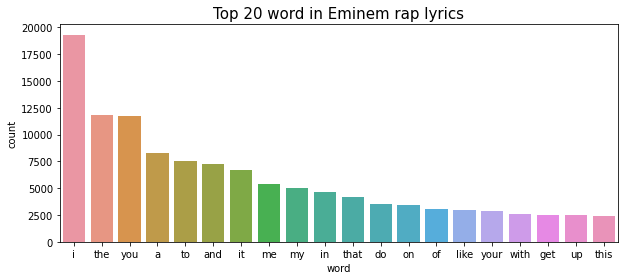

In [47]:
flattened_list = []
for x in lyrics:
    for y in x:
        flattened_list.append(y)
stopwords=['intro', 'verse', 'chorus','!','"', "'", '’', '#','$','%','&','(',')','*','+',',','-','/',':',';','<','=','>','?','@','[','\\',']',
 '^','_','`','{','|','}','~', '1', '...', "'s","'m", "n't" ]
for word in flattened_list:
    if word in stopwords:
        flattened_list.remove(word)
word_count = Counter(flattened_list).most_common(20)
word_count_df = pd.DataFrame(word_count, columns = ['word', 'count'])

#creating a plot, depicting words distribution
fig, (ax) = plt.subplots(figsize = (10, 4))
sns.barplot(x = word_count_df['word'], y = word_count_df['count'], ax = ax)
ax.set_ylabel('count', fontsize = 10)
ax.set_xlabel('word',fontsize = 10)
ax.tick_params(labelsize=10)
ax.set_title('Top 20 word in Eminem rap lyrics', fontsize = 15)

#### As we know, the bigger is testset, the better, therefore let's set the size of at least 40%

In [0]:
train, test = train_test_split(lyrics, test_size=0.4, random_state=11)

#### Since this version of my work is done in Google Colaboratory (which disconnects all the time) and each chunk with text generation takes about 2 hours to execute, the examples of text generation is be provided not for every type of ngrams and model

### 1-grams

In [0]:
n=1

#### Kneser-Ney Interpolated for unigrams, default value of discount = 0.1

In [0]:
train_data_1_KN, padded_sents_1_KN = padded_everygram_pipeline(n, train)

In [0]:
model_1_KN = KneserNeyInterpolated(n, discount=0.1)

In [0]:
model_1_KN.fit(train_data_1_KN, padded_sents_1_KN)

In [0]:
test_data_uni,_ = padded_everygram_pipeline(n, test)
test_uni = []
for i in test_data_uni:
  test_uni.extend(i)

In [103]:
Unigram_KN_PP_01 = model_1_KN.perplexity(test_uni)
Unigram_KN_PP_01

14245.000000168671

#### Kneser-Ney Interpolated for unigrams, set value of discount = 0.9

In [0]:
train_data_9_KN, padded_sents_9_KN = padded_everygram_pipeline(n, train)

In [0]:
model_1_KN_9 = KneserNeyInterpolated(n, discount=0.9)

In [0]:
model_1_KN_9.fit(train_data_9_KN, padded_sents_9_KN)

In [107]:
Unigram_KN_PP_09 = model_1_KN_9.perplexity(test_uni)
Unigram_KN_PP_09

14245.000000168671

In [108]:
print(model_1_KN_9.generate(10, random_seed=1))

['bulimic', 'stove', 'scrubs', 'dick—shit', 'lama', 'incompatible', 'philosophies', 'shrunk', 'betrayed', 'adderall']


In [0]:
#As we can see above, simple generation shows separate words, therefore, new function is included below
#which is fully copypasted from https://www.kaggle.com/alvations/n-gram-language-model-with-nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer

detokenize = TreebankWordDetokenizer().detokenize

def generate_sent(model, num_words, random_seed=42):
    content = []
    for token in model.generate(num_words, random_seed=random_seed):
        if token == '<s>':
            continue
        if token == '</s>':
            break
        content.append(token)
    return detokenize(content)

In [110]:
for i in range(3):
    print(generate_sent(model_1_KN_9, 10, random_seed=i))

stock scarlata hide-and-seek dip lightin handed- shooby-de-doo-wop entitled jukes murderin
bulimic stove scrubs dick—shit lama incompatible philosophies shrunk betrayed adderall
walked villian arrested beanies standpoint roast porcelain eternal nurse nwa


#### Laplace model for unigrams

In [0]:
train_data_LA, padded_sents_LA = padded_everygram_pipeline(n, train)

In [0]:
model_laplace = Laplace(n)

In [0]:
model_laplace.fit(train_data_LA, padded_sents_LA)

In [114]:
Unigram_laplace_PP = model_laplace.perplexity(test_uni)
Unigram_laplace_PP

573.0987302488888

In [115]:
#Let's look at examples of text generation
for i in range(3):
    print(generate_sent(model_laplace, 10, random_seed=i))

them shit hair bitch into goin spit comb i man
- there shuck better idea how nigga stayin, 'em
wrapped with's, the round of cool mink mistake


#### MLE for unigrams

In [0]:
train_data_MLE, padded_sents_MLE = padded_everygram_pipeline(n, train)

In [0]:
model_MLE = MLE(n)

In [0]:
model_MLE.fit(train_data_MLE, padded_sents_MLE)

In [38]:
#Unfortunately, it is infinite because of unknowkn n-grams in test set
Unigram_mle_PP = model_MLE.perplexity(test_uni)
Unigram_mle_PP

inf

In [120]:
#Let's look at examples of text generation
for i in range(3):
    print(generate_sent(model_MLE, 10, random_seed=i))

there shit had beef in go stand chorus i make
, they simple be i hour nigga stomping, 'd
y'all with's, the rrarrrrh of cock mic migraines


### 2-grams

In [0]:
m=2

In [0]:
test_data_bi,_ = padded_everygram_pipeline(2, test)
test_bi = []
for i in test_data_bi:
  test_bi.extend(i)

#### Kneser-Ney Interpolated for bigrams, default value of discount = 0.1

As our previous experience shows us, setting different discounts has no effect, so we will look only at default value of d=0.1

In [0]:
train_data_1_KN_2, padded_sents_1_KN_2 = padded_everygram_pipeline(m, train)

In [0]:
model_2_KN = KneserNeyInterpolated(m, discount=0.1)

In [0]:
model_2_KN.fit(train_data_1_KN_2, padded_sents_1_KN_2)

In [44]:
Bigram_KN_PP_01 = model_2_KN.perplexity(test_bi)
Bigram_KN_PP_01

1931.916190986568

#### Laplace model for bigrams

In [0]:
train_data_LA_2, padded_sents_LA_2 = padded_everygram_pipeline(m, train)

In [0]:
model_laplace_2 = Laplace(m)

In [0]:
model_laplace_2.fit(train_data_LA_2, padded_sents_LA_2)

In [49]:
Bigram_laplace_PP = model_laplace_2.perplexity(test_bi)
Bigram_laplace_PP

571.0400319718012

In [54]:
#Let's look at examples of text generation
for i in [5,6,7,8]:
    print(generate_sent(model_laplace_2, 10, random_seed=i))

know what we want to too )
shady murdered my exhaust
actin' off, look at
you, secret, freeze your caps and it


#### MLE for bigrams

In [0]:
train_data_MLE_2, padded_sents_MLE_2 = padded_everygram_pipeline(m, train)

In [0]:
model_MLE_2 = MLE(m)

In [0]:
model_MLE_2.fit(train_data_MLE_2, padded_sents_MLE_2)

In [58]:
Bigram_mle_PP=model_MLE_2.perplexity(test_bi)
Bigram_mle_PP

inf

In [64]:
#Let's look at examples of text generation via MLE for bigrams
for i in [8,10,11]:
    print(generate_sent(model_MLE_2, 10, random_seed=i))

you, shady's constant controversy
i can look
don't wannahold the corny shit for the


### 3-grams

In [0]:
t=3

In [0]:
test_data_tri,_ = padded_everygram_pipeline(3, test)
test_tri = []
for i in test_data_tri:
  test_tri.extend(i)

#### Kneser-Ney Interpolated for trigrams, default value of discount = 0.1

In [0]:
train_data_1_KN_3, padded_sents_1_KN_3 = padded_everygram_pipeline(t, train)

In [0]:
model_3_KN = KneserNeyInterpolated(t, discount=0.1)

In [0]:
model_3_KN.fit(train_data_1_KN_3, padded_sents_1_KN_3)

In [70]:
Trigram_KN_PP = model_3_KN.perplexity(test_tri)
Trigram_KN_PP

694.172686122184

694.172686122184

#### Laplace model for trigrams

In [0]:
train_data_LA_3, padded_sents_LA_3 = padded_everygram_pipeline(t, train)

In [0]:
model_laplace_3 = Laplace(t)

In [0]:
model_laplace_3.fit(train_data_LA_3, padded_sents_LA_3)

In [74]:
Trigram_laplace_PP = model_laplace_3.perplexity(test_tri)
Trigram_laplace_PP

560.8963894791663

#### MLE for trigrams

In [0]:
train_data_MLE_3, padded_sents_MLE_3 = padded_everygram_pipeline(t, train)

In [0]:
model_MLE_3 = MLE(t)

In [0]:
model_MLE_3.fit(train_data_MLE_3, padded_sents_MLE_3)

In [78]:
Trigram_mle_PP = model_MLE_3.perplexity(test_tri)
Trigram_mle_PP

inf

In [79]:
#Let's look at examples of text generation via MLE for trigrams
for i in [34,5,18]:
    print(generate_sent(model_MLE_3, 10, random_seed=i))

don't wannasmoke but ain't gon '
i may have never made recovery, kid rock and



#### Creating a table with results for each of n-grams (I write values manually because Google Colaboratory disconnects all the time, and previously determined variable become invalid (and perplexity take minimum 1h to be counted). So I just fill in manually the tables with values that you have seen before

In [80]:
compare = {'N-grams':['1-gram', '2-gram', '3-gram'],
        'Kneser-Ney PP': ['14245','1932','694'],
        'Laplace PP': ['573','571','561'],
        'MLE PP': ['inf','inf', 'inf'] }
models = pd.DataFrame(compare, columns = ['N-grams', 'Kneser-Ney PP', 'Laplace PP', 'MLE PP'])
models_perplexity = models.style.set_table_styles([{'selector':'','props':[('border','4px solid #7a7'), ('font-family', 'verdana'),('font-family', 'verdana'), ('font-size', '105%')]}])
models_perplexity

,N-grams,Kneser-Ney PP,Laplace PP,MLE PP
0,1-gram,14245,573,inf
1,2-gram,1932,571,inf
2,3-gram,694,561,inf


#### <span style="color:green">*Conclusion*</span>: In this version of my work lyrics were devided by sentences, and tokenization was executed in the other manner. However, the models were the same, their quality is much better! Maybe if I used more songs, they would be even better, and perplexity would be lower. Still tuning of discount value for Kneser-Ney had no effect on perplexity, all models showed different values of perplexity, which was decreasing while n for ngrams was increasing. Laplace LM showed better results, but we can see how perplexity values for Laplace and Kneser-Ney models become closer with increasing of n (and also we know that Laplace is not perfect for human-like texts). Generated texts leave much to be desired, though. Unfortunately, I had no opportunity to generate rap for every LM because of my computer's limitations. Despite it took all my night before the deadline, getting lower perplexity values was worth it. Yo!

***

### Below there is an attempt to use principle of Markov chains for lyrics generation

In [0]:
tokenized_text = lyricsdf['lyr_token'].tolist()
flattened_lyr = []
for x in tokenized_text:
    for y in x:
        flattened_lyr.append(y)

def make_bigrams(text):
    for i in range(len(text)-1):
        yield (text[i], text[i+1])
        
bigrams = make_bigrams(flattened_lyr)

In [0]:
word_dict = {}

for word_1, word_2 in bigrams:
    if word_1 in word_dict.keys():
        word_dict[word_1].append(word_2)
    else:
        word_dict[word_1] = [word_2]
        
first_word = np.random.choice(flattened_lyr)

In [0]:
while first_word.islower():
    first_word = np.random.choice(flattened_lyr)

chain = [first_word]
n_words = 100

for i in range(n_words):
    chain.append(np.random.choice(word_dict[chain[-1]]))

generated_text = ' '.join(chain)
rap = textwrap.fill(generated_text, width=50)
 
print(rap)

2 met this fucking chick is to hurt you cave in
the pot make us together everything is on riding
on it trying to run deep as i had them some twins
before they say that i need somethin to outrun me
to toe from amityville hell stab in the panelin
cussin no paper i know where must go to think of
evil as i apologize if i have no help propel me
only women skinning your mom your verdict while i
get to dust and did you pissed me and if ten
freaky girls man ya sweeter than an mc


#### Unfortunately, I have no clue how to evaluate the quality of text generation, provided by this method. As far as I can judge, lyrics are not that bad, since there are many pairs and triples of words commonly used together, and some lines even make sense.

***

Heavily based on:
    https://www.kaggle.com/alvations/n-gram-language-model-with-nltk and https://towardsdatascience.com/simulating-text-with-markov-chains-in-python-1a27e6d13fc6